In [1]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

%matplotlib inline

# 1. Hot and cold learning

## 1.1. Initialzing using randomly choosen values

In [ ]:
weight = 0.5
given_input = 0.5
goal_pred = 0.8
step_amount = 0.001

## 1.2. The training

In [ ]:
def neural_network_v1(input):
    return input * weight

In [ ]:
pred = None
for i in tqdm(range(99999)):
    pred = neural_network_v1(given_input)
    error = (pred - goal_pred) ** 2
    
    up_pred = given_input * (weight + step_amount)
    up_error = (goal_pred - up_pred) ** 2
    
    down_pred = given_input * (weight - step_amount)
    down_error = (goal_pred - down_pred) ** 2
    
    if(down_error < up_error):
        weight = weight - step_amount
    if(down_error > up_error):
        weight = weight + step_amount
    
print(pred)

# 2. The Data


## 2.1  Generating data
**Rules for data generation**
- We would like the age to be between 14 to 35
- Gender should be either 0 or 1, 0 being female and 1 male.
- Status would be calcauted using , two simple rules
    - A worker must be 18 years or above for male
    - A worker must be 20 years or above for female

In [2]:
np.random.seed(1)
data = pd.DataFrame({"age"  : np.random.choice(range(15,35), 600),
                     "gender"  : np.random.choice(range(0,2), 600)})
data["is_underage"] = (data["gender"] == 1) & (data["age"] <= 18) | (data["gender"] == 0) & (data["age"] <= 20) 

## 2.1 Data exploration

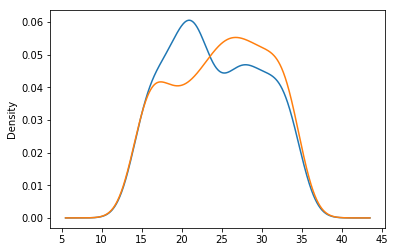

In [3]:
plot = data.groupby('gender').age.plot(kind='kde')

**Chart shows the distribution of people according to their age**

In [4]:
data.head(2)

,age,gender,is_underage
0,20,0,True
1,26,1,False


In [5]:
data.is_underage = data.is_underage.astype(int)

In [6]:
data.head(2)

,age,gender,is_underage
0,20,0,1
1,26,1,0


In [7]:
data['age > 11'] = (data.age > 10).astype(int)
data['age > 12'] = (data.age > 15).astype(int)
data['age > 13'] = (data.age > 20).astype(int)
data['age > 14'] = (data.age > 30).astype(int)

data.head()

,age,gender,is_underage,age > 11,age > 12,age > 13,age > 14
0,20,0,1,1,1,0,0
1,26,1,0,1,1,1,0
2,27,0,0,1,1,1,0
3,23,1,0,1,1,1,0
4,24,1,0,1,1,1,0


# 3. Data Preprocessing

## 3.1. Dividing the data into train and test set

In [8]:
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

print("Train: {0} Test: {1}".format(len(train),len(test)))

Train: 480 Test: 120


**Storing 80 percent of the data as train and remaning as test set**

# 4. Hot and cold learning to predict underage

In [ ]:
            #age #gender
weights = [[0.5,0.48], #not underage
            [0.2,0.6]] #underage
age = train['age'].values.tolist()
gender = train['gender'].values.tolist()
is_underage = train['is_underage'].values.tolist()
training_input = [20,1]
classes = ["not underage","underage"]

**Weights have been randomly choosen**

In [11]:
def weighted_sum(a,b):
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def vector_math_mul(vector,matrix):
    assert (len(vector) == len(matrix))
    
    output = [0,0]
    for i in range (len(vector)):
        output[i] = weighted_sum(vector,matrix[i])
    return output

def neural_network_mul_in_out(input,weights):
    pred = vector_math_mul(input,weights)
    return pred

**A visual demo of matrix multiplication**
http://matrixmultiplication.xyz/

In [ ]:
pred = neural_network_mul_in_out(training_input,weights)
print(pred)
np.array(training_input).dot(np.array(weights))

In [ ]:
[age[0],gender[0],is_underage[0]]

In [ ]:
train.head()

In [ ]:
pred = None
epoch = len(train) * 10
for i in tqdm(range(epoch)):
    for j in range(2):
        training_input = [age[j],gender[j]]
        pred = neural_network_mul_in_out(training_input,weights)
        label = classes.index(classes[pred.index(max(pred))])
        
        if (label == is_underage[j]):
            pass
#           print("Weight found {0}".format(weights))
            


In [ ]:
step_size = 0.1
epoch = len(train) * 2
weights = np.array([0.5,0.5,0.5])
 
for i in tqdm(range(epoch)):
    error_for_all_data = 0
    for row_index in range(len(train)):
        
        training_input = [age[row_index],gender[row_index]]
        goal_pred = is_underage[row_index]
        
        training_input = np.array(training_input)
        goal_pred = np.array(goal_pred)

        
        


In [ ]:
import numpy as np

weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

for iteration in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        prediction = input.dot(weights)
        
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))	
#         print("Prediction:" + str(prediction))
        
#     print("Error:" + str(error_for_all_lights) + "\n")
#     print(weights)



In [9]:
weights = np.array([0.5,0.5,0.5,0.5,0.5])
underage_vs_not_underage = np.array(train["is_underage"])
age_gender = np.array(train.drop(['is_underage','age'],axis=1))



print(age_gender.shape)
print(weights.shape) 
print(underage_vs_not_underage.shape)


(480, 5)
(5,)
(480,)


In [20]:
import sys
epoch = len(train) * 4
alpha = 0.5
for i in tqdm(range(epoch)):
    error_in_all_data = 0
    for row_index in range(len(underage_vs_not_underage)):
        given_input = age_gender[row_index]
        goal_pred = underage_vs_not_underage[row_index]  
        pred = given_input.dot(weights)
        print(pred)
        
        if(row_index == 100):
            sys.exit()
        

  0%|          | 0/1920 [00:00<?, ?it/s]

1.5
2.5
2.0
2.0
2.0
2.0
2.0
1.5
1.5
2.0
2.0
1.5
1.0
0.5
2.0
1.0
1.5
1.5
1.5
1.0
2.0
0.5
0.5
1.0
1.5
0.5
1.5
1.0
1.0
1.5
1.0
1.5
2.0
1.5
2.5
2.0
1.0
1.5
1.5
2.0
2.5
1.5
2.0
1.5
2.0
1.5
2.5
1.5
2.0
2.0
1.5
1.5
2.0
1.0
1.5
1.5
1.5
2.0
1.5
1.5
2.0
1.5
1.5
2.0
2.0
2.0
2.5
2.0
1.5
2.0
2.0
1.5
2.5
1.5
1.0
1.5
2.0
1.5
1.5
2.0
1.5
2.0
1.5
2.5
1.5
2.5
2.5
1.5
2.0
2.0
1.5
1.0
1.5
1.5
1.5
1.5
2.0
2.5
2.0
2.5
2.5


SystemExit: 

/home/nishon/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
weights = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5])
underage_vs_not_underage = data["is_underage"]
age_gender = train.drop(['is_underage'],axis=1)

age_gender = np.array(age_gender)
underage_vs_not_underage = np.array(underage_vs_not_underage)

for i in range(2):
    error_for_all_lights = 0
    print(len(underage_vs_not_underage))
    for row_index in range(len(underage_vs_not_underage)):
        input = age_gender[row_index]
        goal_prediction = underage_vs_not_underage[row_index]
        
        prediction = input.dot(weights)
        
        print(prediction)
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))
       
        
    print("Error:" + str(error_for_all_lights) + "\n")
          